# CAPSTONE PROJECT- PREDICTING HOUSE PRICES 

## PROBLEM STATEMENT

### The prices of houses are influenced by various factors like the size, location, condition, etc. Predicting house prices is important to stakeholders who are housing developers or contractors, investors or those looking to purchase a house.

## OBJECTIVES OF THE PROJECT 

### 1. To build a machine learning model to predict housing prices.
### 2. To determine the relationship between house size and prices
### 3. To determine whether the age of houses influence price.

## 1.0 DATA COLLECTION AND PREPARATION

#### The dataset for this project is from https://www.kaggle.com/datasets/fratzcan/usa-house-prices

### 1.1 IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.ensemble import GradientBoostingRegressor 
from sklearn import tree
from sklearn import ensemble
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.inspection import PartialDependenceDisplay

### 1.2 LOADING THE DATASET

In [2]:
#importing the data 
house_data1 = pd.read_csv('USA Housing Dataset.csv') 

In [3]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [4]:
house_data1.head() 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [5]:
house_data1.shape  #size of the data

(4140, 18)

In [6]:
house_data1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [7]:
house_data1.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

### 1.3 INSPECTING FOR MISSING VALUES

In [8]:
 #checking for missing values
house_data1.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

#### The result shows that there are no missing values in the dataset.

### 1.4 PERFORMING DATA CLEANING 

#### One of the objectives of the project is to determine whether the age of the house influences price. Therefore, I would extract the year the house was sold from the date column and find the difference bewteen year sold and year built.

In [9]:
# To extract the year sold from the date time column
house_data1[['yr_sold', 'month_sold', 'day_sold']] = house_data1['date'].str.split('-', expand=True)
house_data1.head() 


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,yr_sold,month_sold,day_sold
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA,2014,05,09 00:00:00
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA,2014,05,09 00:00:00
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA,2014,05,09 00:00:00
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA,2014,05,09 00:00:00
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA,2014,05,10 00:00:00


In [10]:
house_data1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
 18  yr_sold 

In [11]:
#getting uniques= values in monthh sold
house_data1.month_sold.unique() 

array(['05', '06', '07'], dtype=object)

In [12]:
# Creacting a month dictionary

month_dict = {'05':'May','06':'June', '07':'July'}

In [13]:
# Using mapping to replace month values 
house_data1['month_sold'] = house_data1['month_sold'].map(month_dict) 

In [14]:
house_data1.head() 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,yr_sold,month_sold,day_sold
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA,2014,May,09 00:00:00
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA,2014,May,09 00:00:00
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA,2014,May,09 00:00:00
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA,2014,May,09 00:00:00
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA,2014,May,10 00:00:00


In [15]:
#Converting yr_sold to a numerical feature 
house_data1['yr_sold'] = pd.to_numeric(house_data1['yr_sold']) 

In [16]:
house_data1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
 18  yr_sold 

In [17]:
#Dropping redundant columns for the purpose of the project
house_data1.drop(columns = ['date', 'day_sold', 'street','country','statezip', 'waterfront', 'view'], axis=1)
house_data1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,yr_sold,month_sold,day_sold
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA,2014,May,09 00:00:00
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA,2014,May,09 00:00:00
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA,2014,May,09 00:00:00
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA,2014,May,09 00:00:00
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA,2014,May,10 00:00:00


In [18]:
# Rearranging the columns
house_data1 = house_data1[['yr_built','yr_sold', 'month_sold', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'sqft_above',
       'sqft_basement', 'yr_renovated', 'city']] 

In [19]:
house_data1.head() 

,yr_built,yr_sold,month_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_renovated,city
0,2008,2014,May,376000.0,3.0,2.00,1340,1384,3.0,3,1340,0,0,Seattle
1,2007,2014,May,800000.0,4.0,3.25,3540,159430,2.0,3,3540,0,0,Carnation
2,2010,2014,May,2238888.0,5.0,6.50,7270,130017,2.0,3,6420,850,0,Issaquah
3,2007,2014,May,324000.0,3.0,2.25,998,904,2.0,3,798,200,0,Seattle
4,1979,2014,May,549900.0,5.0,2.75,3060,7015,1.0,5,1600,1460,0,Seattle


In [20]:
#To check for duplicates
house_data1.duplicated().sum() 

0

## 2.0 EXPLORATORY DATA ANALYSIS

In [21]:
# To view the descriptive statistics of the features
house_data1.describe() 

,yr_built,yr_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_renovated
count,4140.000000,4140.0,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,1970.814010,2014.0,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,3.452415,1831.351449,312.287440,808.368357
std,29.807941,0.0,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.678533,861.382947,464.349222,979.380535
min,1900.000000,2014.0,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,1.000000,370.000000,0.000000,0.000000
25%,1951.000000,2014.0,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,3.000000,1190.000000,0.000000,0.000000
50%,1976.000000,2014.0,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,3.000000,1600.000000,0.000000,0.000000
75%,1997.000000,2014.0,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,4.000000,2310.000000,602.500000,1999.000000
max,2014.000000,2014.0,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,5.000000,8020.000000,4820.000000,2014.000000


### 2.1 UNIVARIATE ANALYSIS

In [22]:
# To get all the categorical features in the dataset
categorical_features = house_data1.select_dtypes(include= 'object').columns
categorical_features

Index(['month_sold', 'city'], dtype='object')

In [23]:
house_data1.city.unique() 

array(['Seattle', 'Carnation', 'Issaquah', 'Maple Valley', 'Kent',
       'Redmond', 'Clyde Hill', 'Shoreline', 'Mercer Island', 'Auburn',
       'Bellevue', 'Duvall', 'Renton', 'Sammamish', 'Woodinville',
       'Kirkland', 'Burien', 'Federal Way', 'Normandy Park', 'Vashon',
       'Kenmore', 'Yarrow Point', 'SeaTac', 'Newcastle', 'Covington',
       'Lake Forest Park', 'Snoqualmie', 'Des Moines', 'Fall City',
       'Ravensdale', 'Tukwila', 'North Bend', 'Medina', 'Bothell',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Black Diamond',
       'Beaux Arts Village', 'Algona', 'Preston', 'Milton', 'Skykomish'],
      dtype=object)

In [24]:
house_data1.month_sold.unique() 

array(['May', 'June', 'July'], dtype=object)

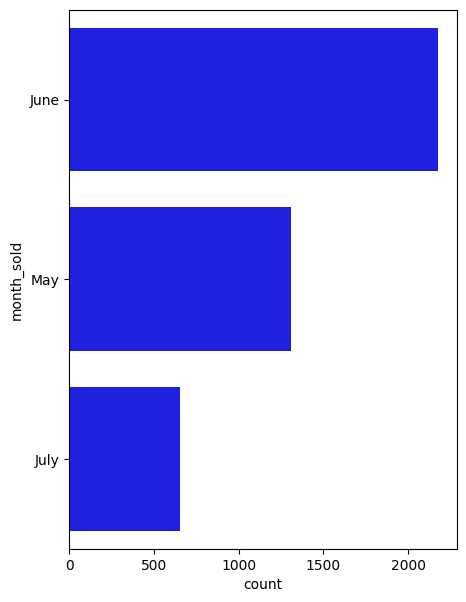

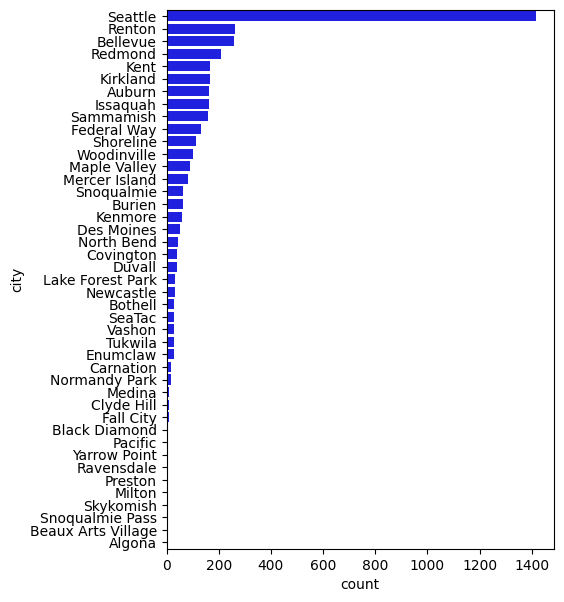

In [25]:
# Visuals showing the distribution of Categorical features
for column in categorical_features:
    fig, axes = plt.subplots(figsize = (5,7))  #size of the plot
    plt.subplots_adjust(hspace = 20)  #vertical spacing between each subplot
    sns.countplot( y = column, data = house_data1, orient= 'h', color = 'blue',
              order = house_data1[column].value_counts().index)
    #axes.tick_params(axis='x', labelrotation=90) #to adjust the position of labels


In [26]:
# To get all the numerical features in the dataset
numerical_features = house_data1.select_dtypes(include = ['int64', 'float64']).columns
numerical_features

Index(['yr_built', 'yr_sold', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'sqft_above', 'sqft_basement',
       'yr_renovated'],
      dtype='object')

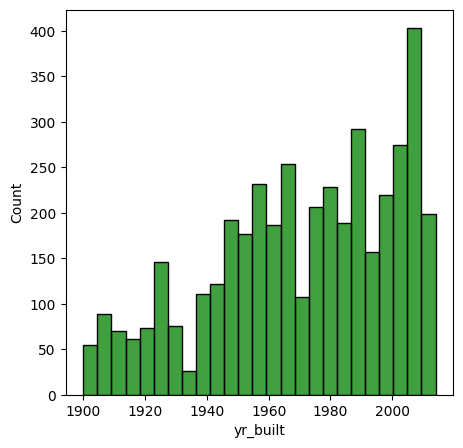

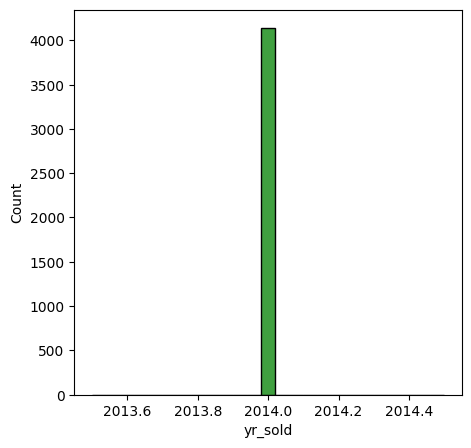

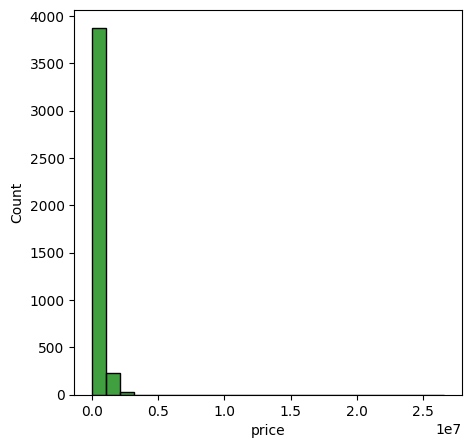

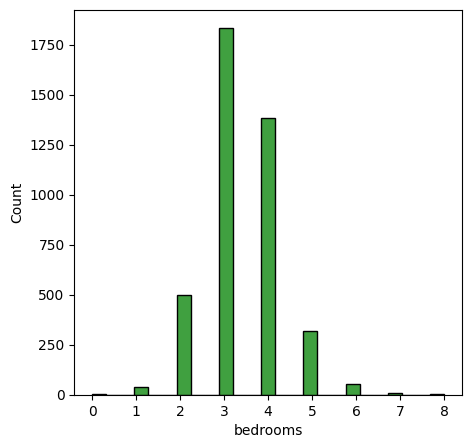

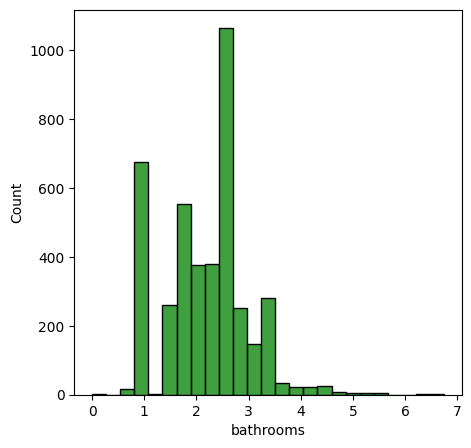

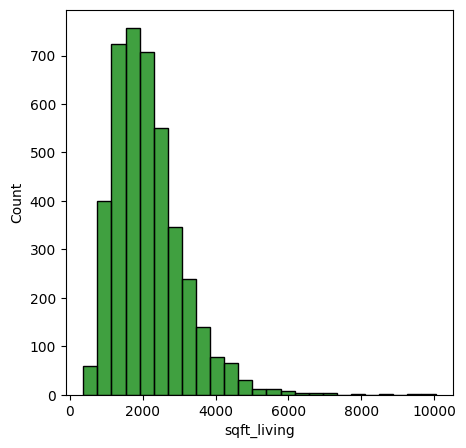

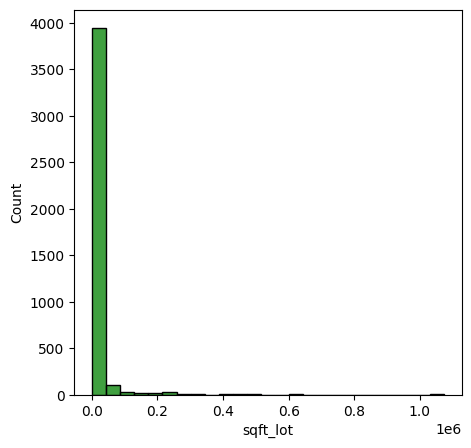

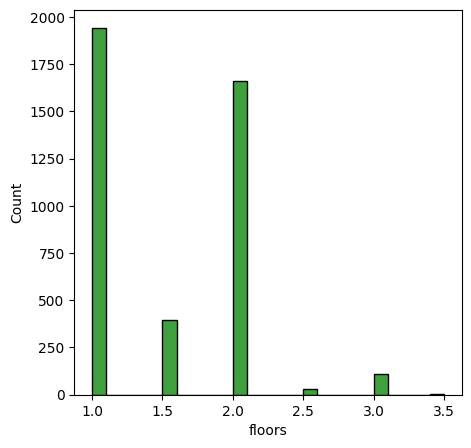

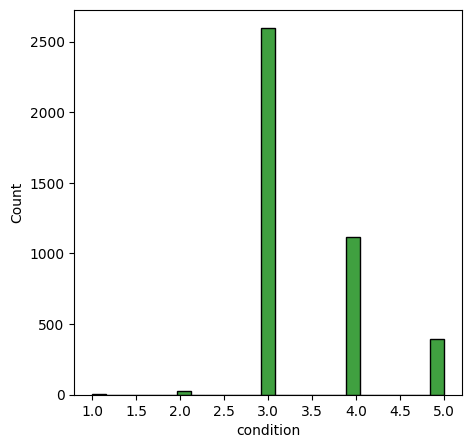

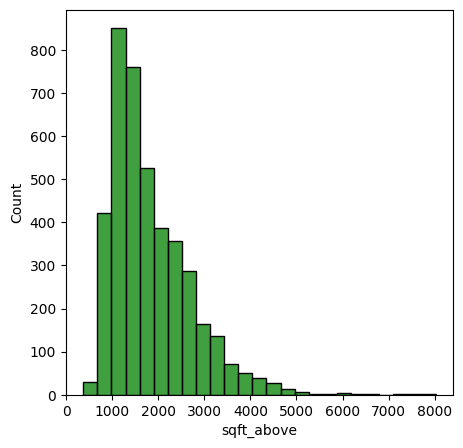

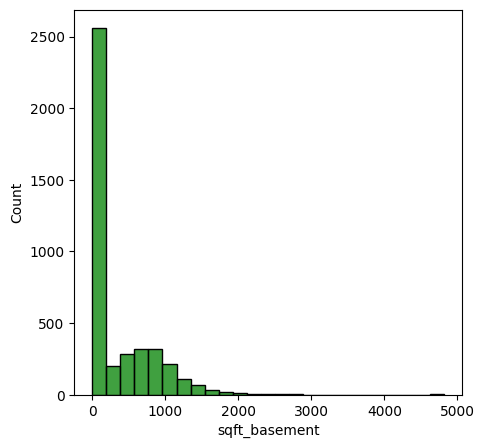

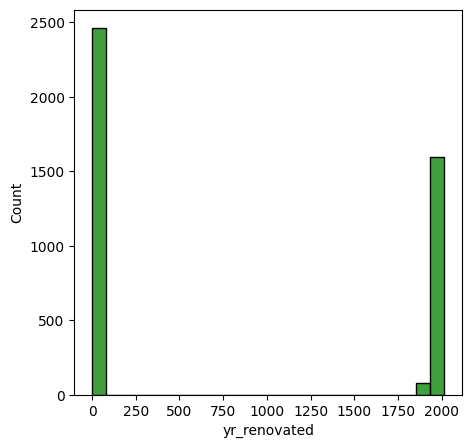

In [27]:
#Visuals showing the distribution of numerical  features
for column in numerical_features:
    fig, axes = plt.subplots(figsize = (5,5)) #size of the plot
    plt.subplots_adjust(hspace = 0.6)        #vertical spacing between each subplot
    sns.histplot( x = column, data = house_data1, bins=25, color = 'green') 
    #axes.tick_params(axis='x', labelrotation=60)

### 2.2 BIVARIATE ANALYSIS 

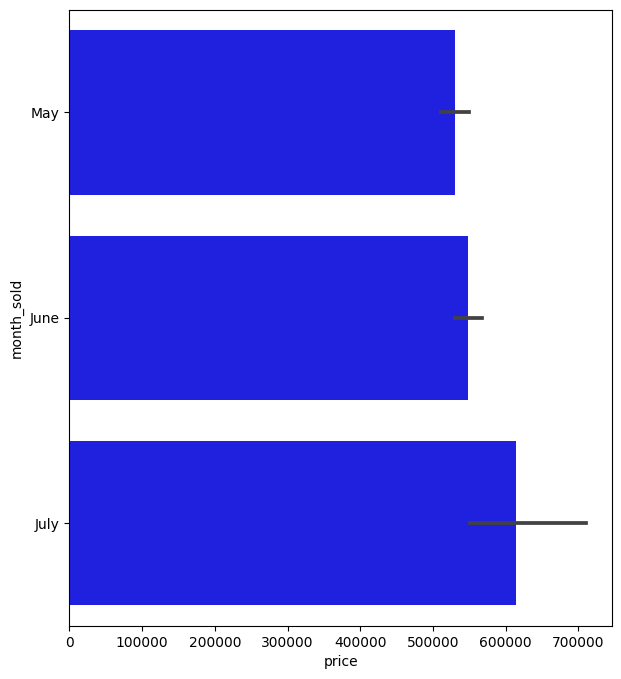

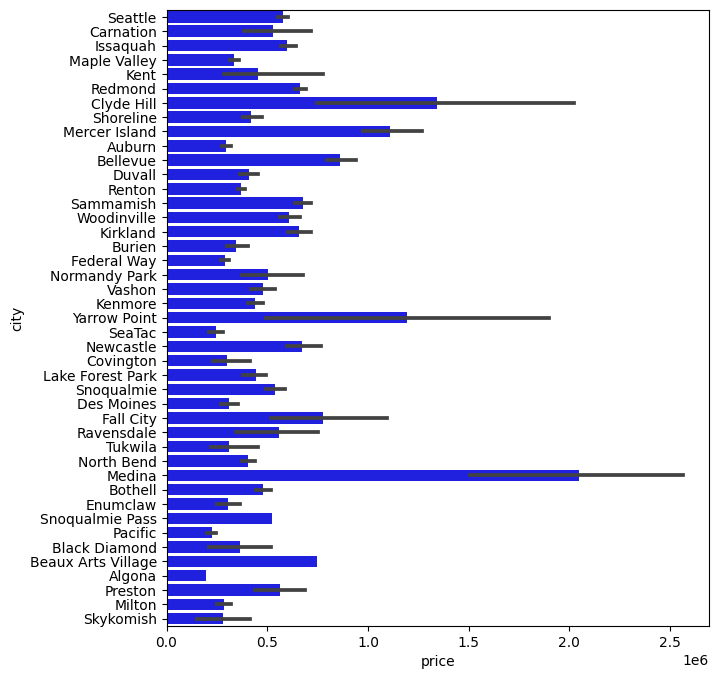

In [28]:
#To display the relationship between categorical features and numerical_features
for column in categorical_features:

    fig, axes = plt.subplots(figsize = (7,8))  #size and dimension of the plot
    plt.subplots_adjust(hspace = 0.8)  #vertical spacing between each subplot
    #axes.tick_params(axis='x', labelrotation=60)
    sns.barplot(x = 'price', y= column,  data = house_data1, orient='h', color = 'blue')

#### Visual Showing the Relationship Between Price and Year Renovated

In [29]:
house_data1.yr_renovated.unique() 

array([   0, 2007, 2003, 2006, 1970, 2009, 1990, 1994, 2000, 1983, 2001,
       2014, 1923, 1956, 1997, 1989, 1981, 1912, 2004, 1979, 1984, 2011,
       1982, 1999, 2002, 1969, 2012, 2013, 1972, 2008, 2005, 1988, 1998,
       1985, 1974, 1971, 1996, 2010, 1954, 1963, 1992, 1945, 1993, 1968,
       1995, 1986, 1934, 1953, 1966, 1955, 1958, 1987, 1960, 1978, 1980,
       1948, 1991, 1913, 1977, 1975], dtype=int64)

Text(0.5, 1.0, 'Price vs Year Renovated')

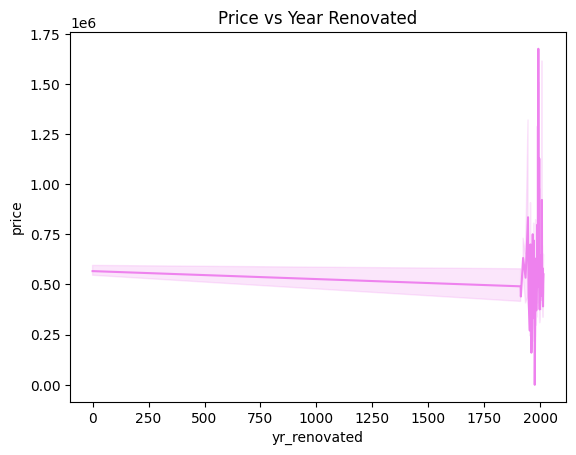

In [30]:
sns.lineplot(data= house_data1, x = 'yr_renovated', y='price', color = 'violet')
plt.title('Price vs Year Renovated')

#### Visual Showing the Relationship Between Price and Year Built

In [31]:
house_data1.yr_built.unique() #unique values of year built

array([2008, 2007, 2010, 1979, 2003, 1921, 1962, 2006, 1902, 2001, 1995,
       2014, 1953, 2004, 1952, 1941, 1928, 1986, 1978, 1910, 1975, 1990,
       1906, 2000, 1951, 1987, 1943, 1954, 1966, 1999, 1961, 1980, 2013,
       1956, 1968, 1969, 1955, 1989, 1922, 1917, 1959, 1930, 2009, 1918,
       1963, 1936, 1945, 1992, 1964, 1976, 1919, 1911, 2012, 2005, 1993,
       1977, 1972, 1981, 1994, 1957, 1958, 1967, 1942, 1927, 1970, 1923,
       1939, 1947, 1931, 1973, 1944, 1909, 1905, 1982, 1925, 1937, 1950,
       2002, 1929, 1984, 1974, 1998, 1948, 1965, 1904, 1926, 1903, 1924,
       1991, 1988, 1940, 1997, 1949, 1946, 1983, 1932, 1912, 1985, 1996,
       1960, 1900, 1920, 1901, 1907, 1908, 1914, 2011, 1915, 1938, 1916,
       1935, 1913, 1971, 1933, 1934], dtype=int64)

Text(0.5, 1.0, 'Price vs Year Built')

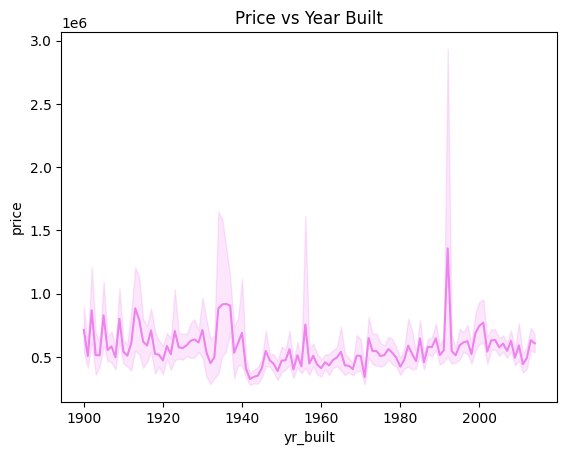

In [32]:
sns.lineplot(data= house_data1, x = 'yr_built', y='price', color = 'violet')
plt.title('Price vs Year Built')

<Axes: xlabel='month_sold', ylabel='price'>

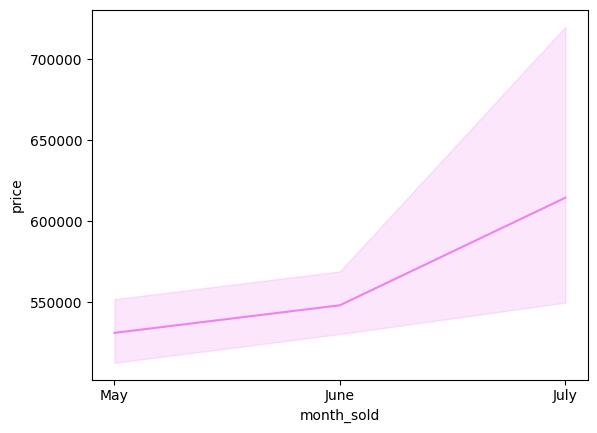

In [33]:
sns.lineplot(data= house_data1, x = 'month_sold', y='price', color = 'violet')

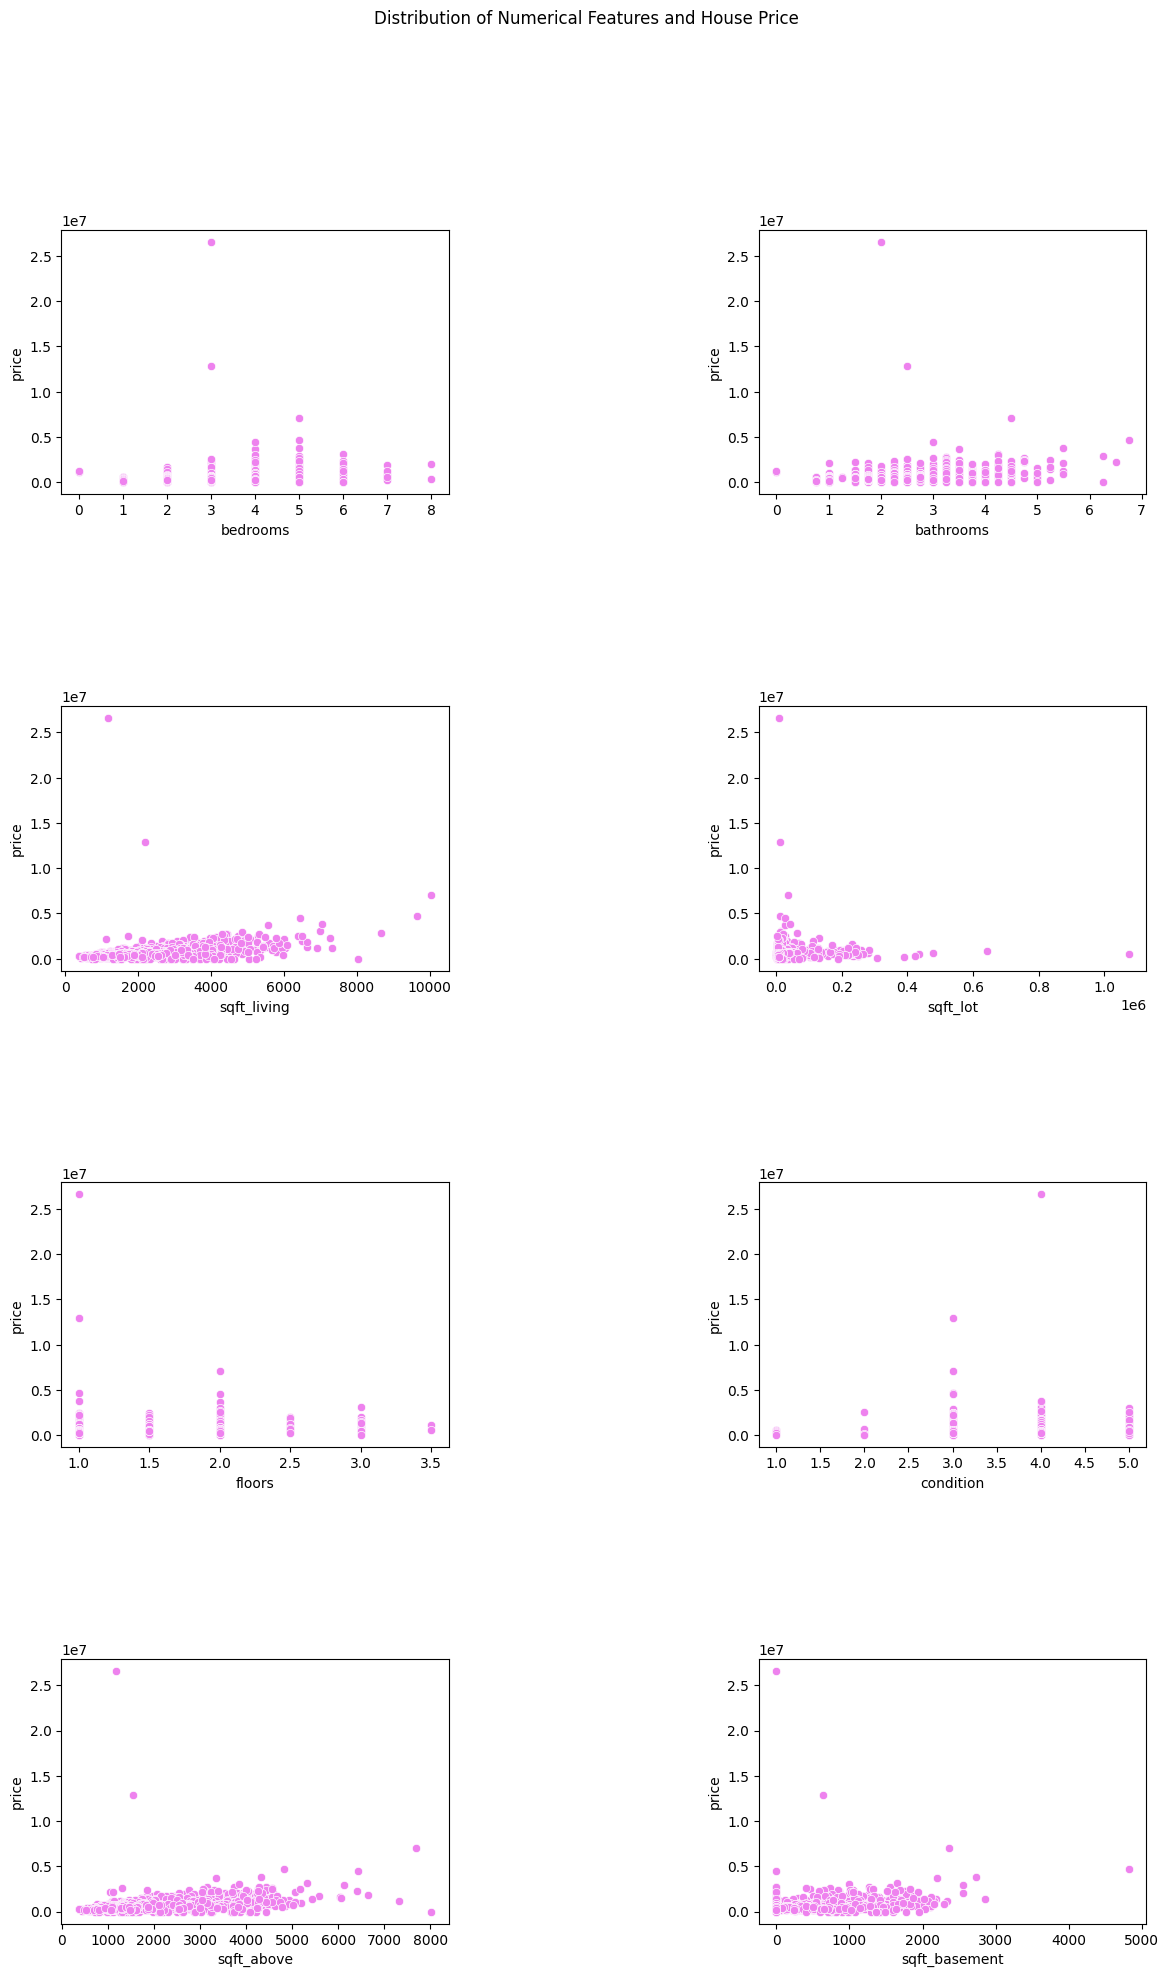

In [34]:
# To display the relationship between numerical features and price

fig, axes = plt.subplots(4, 2, figsize = (14, 22))  #size and dimension of the plot
plt.subplots_adjust(hspace = 0.8)  #vertical spacing between each subplot
plt.subplots_adjust(wspace = 0.8)  #horizontal spacing between each subplot
fig.suptitle('Distribution of Numerical Features and House Price') #title of the plot


sns.scatterplot(ax = axes[0, 0], data= house_data1, x = 'bedrooms', y='price', color = 'violet');

sns.scatterplot(ax = axes[0, 1], data= house_data1, x = 'bathrooms', y='price', color = 'violet');

sns.scatterplot(ax = axes[1, 0], data= house_data1, x = 'sqft_living', y='price', color = 'violet');

sns.scatterplot(ax = axes[1, 1], data= house_data1, x = 'sqft_lot', y='price', color = 'violet');

sns.scatterplot(ax = axes[2, 0], data= house_data1, x = 'floors', y='price', color = 'violet');

sns.scatterplot(ax = axes[2, 1], data= house_data1, x = 'condition', y='price', color = 'violet');

sns.scatterplot(ax = axes[3, 0], data= house_data1, x = 'sqft_above', y='price', color = 'violet');

sns.scatterplot(ax = axes[3, 1], data= house_data1, x = 'sqft_basement', y='price',color = 'violet');


### 2.3 IDENTIFYING AND HANDLING OUTLIERS

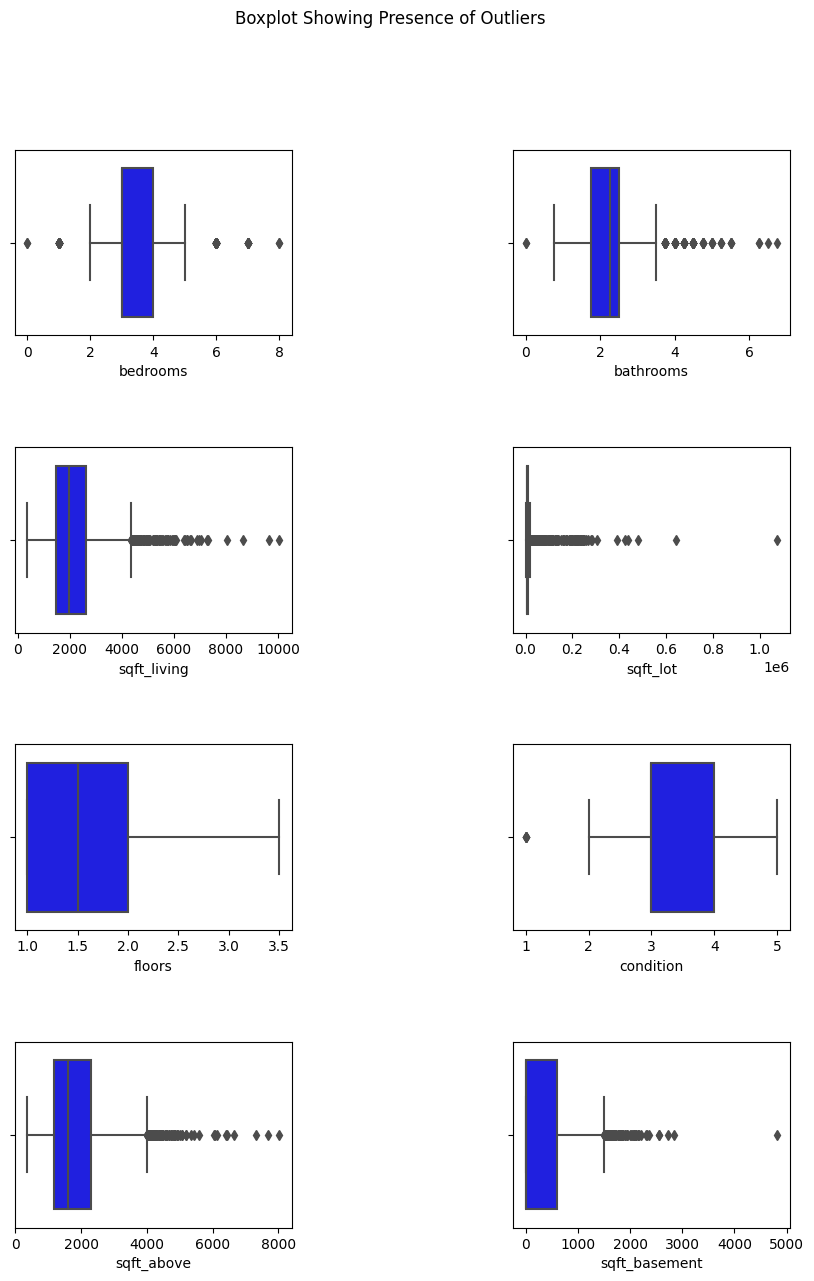

In [35]:
# Identifying outliers
fig, axes = plt.subplots(4, 2, figsize = (10,14))  #size and dimension of the plot
plt.subplots_adjust(hspace = 0.6)  #vertical spacing between each subplot
plt.subplots_adjust(wspace = 0.8)  #horizontal spacing between each subplot
fig.suptitle('Boxplot Showing Presence of Outliers')

sns.boxplot(ax = axes[0, 0], x= 'bedrooms',  data = house_data1, color = 'blue',
              order = house_data1['bedrooms'].value_counts().index);
sns.boxplot(ax = axes[0, 1], x= 'bathrooms', data = house_data1, color = 'blue',
              order = house_data1['bathrooms'].value_counts().index);
sns.boxplot(ax = axes[1, 0], x= 'sqft_living', data = house_data1, color = 'blue',
              order = house_data1['sqft_living'].value_counts().index);
sns.boxplot(ax = axes[1, 1], x= 'sqft_lot', data = house_data1, color = 'blue',
              order = house_data1['sqft_lot'].value_counts().index);
sns.boxplot(ax = axes[2, 0],  x= 'floors', data = house_data1, color = 'blue',
              order = house_data1['floors'].value_counts().index);
sns.boxplot(ax = axes[2, 1], x= 'condition', data = house_data1, color = 'blue',
              order = house_data1['condition'].value_counts().index);
sns.boxplot(ax = axes[3, 0], x= 'sqft_above', data = house_data1, color = 'blue',
              order = house_data1['sqft_above'].value_counts().index);
sns.boxplot(ax = axes[3, 1],  x= 'sqft_basement', data = house_data1, color = 'blue',
              order = house_data1['sqft_basement'].value_counts().index);


In [36]:
# Defining a function to get outliers
def outliers(data, feature):
    Q1 = house_data1[feature].quantile(0.25)
    Q3= house_data1[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

In [37]:
index_list = []
for feature in  house_data1.columns:
    if house_data1[feature].dtype == 'int64' or house_data1[feature].dtype == 'float64':
       index_list.extend(outliers(house_data1, feature).index)
        
     

In [38]:
# Defining a function to replace the outliers with median value
def replace_outliers_with_median(df):
    for col in df.columns:
        if np.issubdtype(df[col].dtype, np.number):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            median = df[col].median()
            df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])
    return df

# Replace outliers with the median
cleaned_data = replace_outliers_with_median(house_data1)
print(cleaned_data)

      yr_built  yr_sold month_sold          price  bedrooms  bathrooms  \
0       2008.0   2014.0        May  376000.000000       3.0       2.00   
1       2007.0   2014.0        May  800000.000000       4.0       3.25   
2       2010.0   2014.0        May  460000.000000       5.0       2.25   
3       2007.0   2014.0        May  324000.000000       3.0       2.25   
4       1979.0   2014.0        May  549900.000000       5.0       2.75   
...        ...      ...        ...            ...       ...        ...   
4135    1954.0   2014.0       July  308166.666667       3.0       1.75   
4136    1983.0   2014.0       July  534333.333333       3.0       2.50   
4137    2009.0   2014.0       July  416904.166667       3.0       2.50   
4138    1974.0   2014.0       July  203400.000000       4.0       2.00   
4139    1990.0   2014.0       July  220600.000000       3.0       2.50   

      sqft_living  sqft_lot  floors  condition  sqft_above  sqft_basement  \
0          1340.0    1384.0     3.

In [39]:
numerical_features

Index(['yr_built', 'yr_sold', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'sqft_above', 'sqft_basement',
       'yr_renovated'],
      dtype='object')

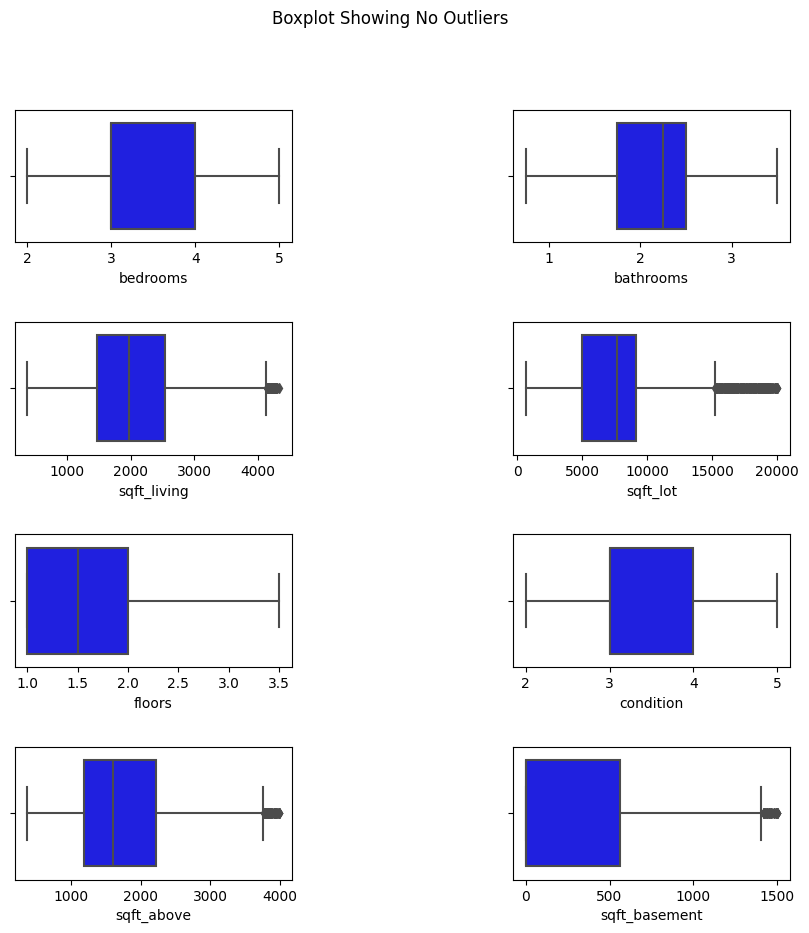

In [40]:
# Plotting subplots showing no outliers
fig, axes = plt.subplots(4, 2, figsize = (10, 10))  #size and dimension of the plot
plt.subplots_adjust(hspace = 0.6)  #vertical spacing between each subplot
plt.subplots_adjust(wspace = 0.8)  #horizontal spacing between each subplot
fig.suptitle('Boxplot Showing No Outliers')

sns.boxplot(ax = axes[0, 0], x= 'bedrooms',  data = house_data1, color = 'blue',
              order = house_data1['bedrooms'].value_counts().index);
sns.boxplot(ax = axes[0, 1], x= 'bathrooms', data = house_data1, color = 'blue',
              order = house_data1['bathrooms'].value_counts().index);
sns.boxplot(ax = axes[1, 0], x= 'sqft_living', data = house_data1, color = 'blue',
              order = house_data1['sqft_living'].value_counts().index);
sns.boxplot(ax = axes[1, 1], x= 'sqft_lot', data = house_data1, color = 'blue',
              order = house_data1['sqft_lot'].value_counts().index);
sns.boxplot(ax = axes[2, 0],  x= 'floors', data = house_data1, color = 'blue',
              order = house_data1['floors'].value_counts().index);
sns.boxplot(ax = axes[2, 1], x= 'condition', data = house_data1, color = 'blue',
              order = house_data1['condition'].value_counts().index);
sns.boxplot(ax = axes[3, 0], x= 'sqft_above', data = house_data1, color = 'blue',
              order = house_data1['sqft_above'].value_counts().index);
sns.boxplot(ax = axes[3, 1],  x= 'sqft_basement', data = house_data1, color = 'blue',
              order = house_data1['sqft_basement'].value_counts().index);


## 3.0 FEATURE ENGINEERING

In [41]:
house_data1.columns

Index(['yr_built', 'yr_sold', 'month_sold', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'condition', 'sqft_above',
       'sqft_basement', 'yr_renovated', 'city'],
      dtype='object')

### 3.1 CREATING NEW FEATURES

#### I would add two new features to the data; the total square feet of the house and the age of the house. 
#### To get total square feet of the house, I summed the square feet of the living space, the floors above and the basement. This feature represents the size of the house. 
#### To get the age of the house, I found the difference between the year it was built and the year it was sold.

In [42]:
#Creating Total Building Square feet column

house_data1['totalsqft_house'] = house_data1['sqft_living'] + house_data1['sqft_above'] + house_data1['sqft_basement']
house_data1['totalsqft_house']

0       2680.0
1       7080.0
2       4430.0
3       1996.0
4       6120.0
         ...  
4135    3020.0
4136    2920.0
4137    6020.0
4138    4180.0
4139    2980.0
Name: totalsqft_house, Length: 4140, dtype: float64

In [43]:
#Creating Age of the house column 

house_data1['house_age'] =  house_data1['yr_sold'] - house_data1['yr_built']
house_data1['house_age'] 

0        6.0
1        7.0
2        4.0
3        7.0
4       35.0
        ... 
4135    60.0
4136    31.0
4137     5.0
4138    40.0
4139    24.0
Name: house_age, Length: 4140, dtype: float64

In [44]:
# Selecting columns relevant to the objectives of the project

house_data2 = house_data1[['house_age','totalsqft_house','sqft_lot', 'floors', 'bedrooms', 'bathrooms','city','month_sold', 'price']]
house_data2

,house_age,totalsqft_house,sqft_lot,floors,bedrooms,bathrooms,city,month_sold,price
0,6.0,2680.0,1384.0,3.0,3.0,2.00,Seattle,May,376000.000000
1,7.0,7080.0,7676.0,2.0,4.0,3.25,Carnation,May,800000.000000
2,4.0,4430.0,7676.0,2.0,5.0,2.25,Issaquah,May,460000.000000
3,7.0,1996.0,904.0,2.0,3.0,2.25,Seattle,May,324000.000000
4,35.0,6120.0,7015.0,1.0,5.0,2.75,Seattle,May,549900.000000
...,...,...,...,...,...,...,...,...,...
4135,60.0,3020.0,6360.0,1.0,3.0,1.75,Seattle,July,308166.666667
4136,31.0,2920.0,7573.0,2.0,3.0,2.50,Bellevue,July,534333.333333
4137,5.0,6020.0,7014.0,2.0,3.0,2.50,Renton,July,416904.166667
4138,40.0,4180.0,6630.0,1.0,4.0,2.00,Seattle,July,203400.000000


In [45]:
house_data2['house_age'].unique()

array([  6.,   7.,   4.,  35.,  11.,  93.,  52.,   8., 112.,  13.,  19.,
         0.,  61.,  10.,  62.,  73.,  86.,  28.,  36., 104.,  39.,  24.,
       108.,  14.,  63.,  27.,  71.,  60.,  48.,  15.,  53.,  34.,   1.,
        58.,  46.,  45.,  59.,  25.,  92.,  97.,  55.,  84.,   5.,  96.,
        51.,  78.,  69.,  22.,  50.,  38.,  95., 103.,   2.,   9.,  21.,
        37.,  42.,  33.,  20.,  57.,  56.,  47.,  72.,  87.,  44.,  91.,
        75.,  67.,  83.,  41.,  70., 105., 109.,  32.,  89.,  77.,  64.,
        12.,  85.,  30.,  40.,  16.,  66.,  49., 110.,  88., 111.,  90.,
        23.,  26.,  74.,  17.,  65.,  68.,  31.,  82., 102.,  29.,  18.,
        54., 114.,  94., 113., 107., 106., 100.,   3.,  99.,  76.,  98.,
        79., 101.,  43.,  81.,  80.])

<function matplotlib.pyplot.show(close=None, block=None)>

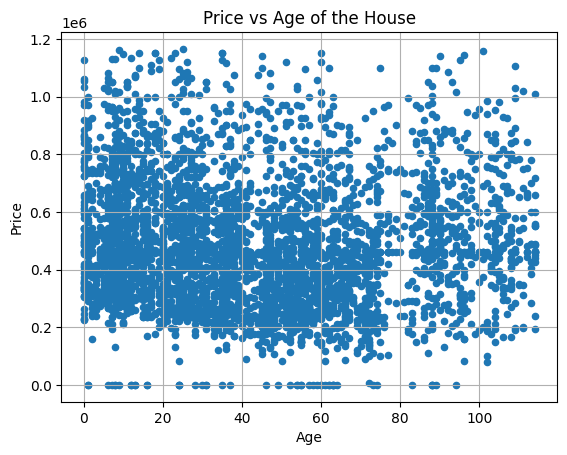

In [46]:
house_data2.plot(kind='scatter', grid=True, x='house_age', y='price')
plt.title('Price vs Age of the House')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

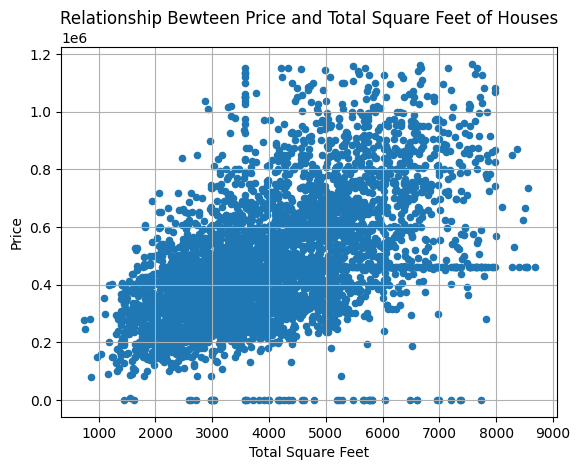

In [47]:
house_data2.plot(kind='scatter', grid=True, x='totalsqft_house', y='price')
plt.title('Relationship Bewteen Price and Total Square Feet of Houses')
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.show

### 3.2 ENCODING CATEGORICAL VARIABLES

In [48]:
category_columns = ['city']

category_features = house_data2[category_columns]

In [49]:
# Initialise OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(category_features)

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [50]:
#encode the categorical data using transform method 
encoded_data = pd.DataFrame(encoder.transform(category_features), columns=encoder.get_feature_names_out(category_columns))  
encoded_data

,city_Algona,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,city_Bothell,city_Burien,city_Carnation,city_Clyde Hill,city_Covington,city_Des Moines,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Lake Forest Park,city_Maple Valley,city_Medina,city_Mercer Island,city_Milton,city_Newcastle,city_Normandy Park,city_North Bend,city_Pacific,city_Preston,city_Ravensdale,city_Redmond,city_Renton,city_Sammamish,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4136,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
#joining the encoded data and housedata2
house_data3 = pd.concat([house_data2, encoded_data], axis=1) 
house_data3

,house_age,totalsqft_house,sqft_lot,floors,bedrooms,bathrooms,city,month_sold,price,city_Algona,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,city_Bothell,city_Burien,city_Carnation,city_Clyde Hill,city_Covington,city_Des Moines,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Lake Forest Park,city_Maple Valley,city_Medina,city_Mercer Island,city_Milton,city_Newcastle,city_Normandy Park,city_North Bend,city_Pacific,city_Preston,city_Ravensdale,city_Redmond,city_Renton,city_Sammamish,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,6.0,2680.0,1384.0,3.0,3.0,2.00,Seattle,May,376000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,7080.0,7676.0,2.0,4.0,3.25,Carnation,May,800000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,4430.0,7676.0,2.0,5.0,2.25,Issaquah,May,460000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.0,1996.0,904.0,2.0,3.0,2.25,Seattle,May,324000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,35.0,6120.0,7015.0,1.0,5.0,2.75,Seattle,May,549900.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,60.0,3020.0,6360.0,1.0,3.0,1.75,Seattle,July,308166.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4136,31.0,2920.0,7573.0,2.0,3.0,2.50,Bellevue,July,534333.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4137,5.0,6020.0,7014.0,2.0,3.0,2.50,Renton,July,416904.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4138,40.0,4180.0,6630.0,1.0,4.0,2.00,Seattle,July,203400.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.3 STANDARDISATION

#### The purpose of normalisation to ensure that all features are on the same scale. For the purpose of this project, I decided to use standard scaler because I want to assume a normal distribution and reduce the model's sensitivity to any outlier.


In [52]:
#Drop the original categorical columns as they are now one-hot encoded
house_data3 = house_data3.drop(category_columns, axis=1)

In [53]:
# Select only numerical columns for scaling
numeric_columns = house_data3.select_dtypes(include=['number']).columns
numeric_data = house_data3[numeric_columns]

# Fit and transform the scaler on numerical data only
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [54]:
# Create a DataFrame from the scaled data
house_data3 = pd.DataFrame(scaled_data, columns=numeric_columns)
house_data3


,house_age,totalsqft_house,sqft_lot,floors,bedrooms,bathrooms,price,city_Algona,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,city_Bothell,city_Burien,city_Carnation,city_Clyde Hill,city_Covington,city_Des Moines,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Lake Forest Park,city_Maple Valley,city_Medina,city_Mercer Island,city_Milton,city_Newcastle,city_Normandy Park,city_North Bend,city_Pacific,city_Preston,city_Ravensdale,city_Redmond,city_Renton,city_Sammamish,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,-1.247670,-0.931503,-1.706311,2.777969,-0.462532,-0.149608,-0.482432,-0.015544,-0.201802,-0.015544,-0.258863,-0.041154,-0.085436,-0.125306,-0.066082,-0.049207,-0.097519,-0.112784,-0.097519,-0.082519,-0.046676,-0.180766,-0.201802,-0.1192,-0.205021,-0.204381,-0.089639,-0.149071,-0.051615,-0.141264,-0.021985,-0.086859,-0.062287,-0.104828,-0.038097,-0.021985,-0.031099,-0.23058,-0.259394,-0.199195,-0.08399,1.387730,-0.166749,-0.021985,-0.126297,-0.015544,-0.082519,-0.082519,-0.159731,-0.031099
1,-1.214118,1.996715,0.051910,0.908378,0.800583,1.698180,1.467074,-0.015544,-0.201802,-0.015544,-0.258863,-0.041154,-0.085436,-0.125306,15.132746,-0.049207,-0.097519,-0.112784,-0.097519,-0.082519,-0.046676,-0.180766,-0.201802,-0.1192,-0.205021,-0.204381,-0.089639,-0.149071,-0.051615,-0.141264,-0.021985,-0.086859,-0.062287,-0.104828,-0.038097,-0.021985,-0.031099,-0.23058,-0.259394,-0.199195,-0.08399,-0.720601,-0.166749,-0.021985,-0.126297,-0.015544,-0.082519,-0.082519,-0.159731,-0.031099
2,-1.314775,0.233129,0.051910,0.908378,2.063697,0.219949,-0.096209,-0.015544,-0.201802,-0.015544,-0.258863,-0.041154,-0.085436,-0.125306,-0.066082,-0.049207,-0.097519,-0.112784,-0.097519,-0.082519,-0.046676,-0.180766,4.955356,-0.1192,-0.205021,-0.204381,-0.089639,-0.149071,-0.051615,-0.141264,-0.021985,-0.086859,-0.062287,-0.104828,-0.038097,-0.021985,-0.031099,-0.23058,-0.259394,-0.199195,-0.08399,-0.720601,-0.166749,-0.021985,-0.126297,-0.015544,-0.082519,-0.082519,-0.159731,-0.031099
3,-1.214118,-1.386708,-1.840442,0.908378,-0.462532,0.219949,-0.721523,-0.015544,-0.201802,-0.015544,-0.258863,-0.041154,-0.085436,-0.125306,-0.066082,-0.049207,-0.097519,-0.112784,-0.097519,-0.082519,-0.046676,-0.180766,-0.201802,-0.1192,-0.205021,-0.204381,-0.089639,-0.149071,-0.051615,-0.141264,-0.021985,-0.086859,-0.062287,-0.104828,-0.038097,-0.021985,-0.031099,-0.23058,-0.259394,-0.199195,-0.08399,1.387730,-0.166749,-0.021985,-0.126297,-0.015544,-0.082519,-0.082519,-0.159731,-0.031099
4,-0.274658,1.357831,-0.132798,-0.961214,2.063697,0.959064,0.317141,-0.015544,-0.201802,-0.015544,-0.258863,-0.041154,-0.085436,-0.125306,-0.066082,-0.049207,-0.097519,-0.112784,-0.097519,-0.082519,-0.046676,-0.180766,-0.201802,-0.1192,-0.205021,-0.204381,-0.089639,-0.149071,-0.051615,-0.141264,-0.021985,-0.086859,-0.062287,-0.104828,-0.038097,-0.021985,-0.031099,-0.23058,-0.259394,-0.199195,-0.08399,1.387730,-0.166749,-0.021985,-0.126297,-0.015544,-0.082519,-0.082519,-0.159731,-0.031099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,0.564146,-0.705232,-0.315830,-0.961214,-0.462532,-0.519166,-0.794322,-0.015544,-0.201802,-0.015544,-0.258863,-0.041154,-0.085436,-0.125306,-0.066082,-0.049207,-0.097519,-0.112784,-0.097519,-0.082519,-0.046676,-0.180766,-0.201802,-0.1192,-0.205021,-0.204381,-0.089639,-0.149071,-0.051615,-0.141264,-0.021985,-0.086859,-0.062287,-0.104828,-0.038097,-0.021985,-0.031099,-0.23058,-0.259394,-0.199195,-0.08399,1.387730,-0.166749,-0.021985,-0.126297,-0.015544,-0.082519,-0.082519,-0.159731,-0.031099
4136,-0.408866,-0.771782,0.023128,0.908378,-0.462532,0.589507,0.245568,-0.015544,-0.201802,-0.015544,3.863040,-0.0411

In [55]:
house_data3.columns 

Index(['house_age', 'totalsqft_house', 'sqft_lot', 'floors', 'bedrooms',
       'bathrooms', 'price', 'city_Algona', 'city_Auburn',
       'city_Beaux Arts Village', 'city_Bellevue', 'city_Black Diamond',
       'city_Bothell', 'city_Burien', 'city_Carnation', 'city_Clyde Hill',
       'city_Covington', 'city_Des Moines', 'city_Duvall', 'city_Enumclaw',
       'city_Fall City', 'city_Federal Way', 'city_Issaquah', 'city_Kenmore',
       'city_Kent', 'city_Kirkland', 'city_Lake Forest Park',
       'city_Maple Valley', 'city_Medina', 'city_Mercer Island', 'city_Milton',
       'city_Newcastle', 'city_Normandy Park', 'city_North Bend',
       'city_Pacific', 'city_Preston', 'city_Ravensdale', 'city_Redmond',
       'city_Renton', 'city_Sammamish', 'city_SeaTac', 'city_Seattle',
       'city_Shoreline', 'city_Skykomish', 'city_Snoqualmie',
       'city_Snoqualmie Pass', 'city_Tukwila', 'city_Vashon',
       'city_Woodinville', 'city_Yarrow Point'],
      dtype='object')

In [56]:
#displaying correlation matrix
house_data3.corr(numeric_only=True) 

,house_age,totalsqft_house,sqft_lot,floors,bedrooms,bathrooms,price,city_Algona,city_Auburn,city_Beaux Arts Village,city_Bellevue,city_Black Diamond,city_Bothell,city_Burien,city_Carnation,city_Clyde Hill,city_Covington,city_Des Moines,city_Duvall,city_Enumclaw,city_Fall City,city_Federal Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Lake Forest Park,city_Maple Valley,city_Medina,city_Mercer Island,city_Milton,city_Newcastle,city_Normandy Park,city_North Bend,city_Pacific,city_Preston,city_Ravensdale,city_Redmond,city_Renton,city_Sammamish,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
house_age,1.000000,-0.302803,-0.012357,-0.470139,-0.178590,-0.507619,-0.062065,-0.011049,-0.065583,0.012420,-0.032916,-0.008147,-0.033116,0.057290,-0.024555,0.008113,-0.046332,0.022292,-0.066887,0.007099,-0.010732,-0.047797,-0.150093,-0.032463,-0.083126,-0.062496,0.014478,-0.129139,-0.002841,-0.007786,-0.008989,-0.056008,0.018812,-0.044033,-0.028785,0.015722,-0.014541,-0.144101,-0.086050,-0.139734,0.015121,0.447686,0.065348,-0.009726,-0.124068,-0.014178,0.044377,0.018075,-0.062603,0.005284
totalsqft_house,-0.302803,1.000000,0.233130,0.359158,0.566144,0.693262,0.533132,-0.009927,-0.031843,-0.011376,0.120950,-0.000931,0.032502,-0.039038,0.004460,0.052176,-0.030533,-0.032362,0.008124,-0.023127,0.011434,-0.017353,0.071633,-0.006719,-0.016160,0.047664,0.017481,0.009642,0.052253,0.115889,-0.022966,0.054466,0.005293,-0.007436,-0.026318,0.007027,0.016305,0.085384,0.006759,0.160173,-0.040393,-0.237420,-0.074357,-0.014480,0.079719,0.001244,-0.034620,-0.012846,0.083043,0.017909
sqft_lot,-0.012357,0.233130,1.000000,-0.242834,0.223147,0.035612,0.012854,-0.000600,0.032232,0.010032,0.176434,0.016838,0.021666,0.066465,0.033405,0.039151,-0.002170,0.031115,0.053305,0.016530,0.020386,0.072242,-0.070527,0.076088,0.048463,0.066917,0.068307,-0.025538,0.093441,0.186210,0.016340,0.071833,0.067815,0.053917,0.017767,0.015289,0.010719,0.042536,0.030015,0.128394,0.038232,-0.474793,0.039530,0.001141,-0.017105,0.012473,0.068763,0.041598,0.062176,0.051122
floors,-0.470139,0.359158,-0.242834,1.000000,0.186284,0.500053,0.257663,-0.014941,-0.025127,-0.014941,-0.045928,-0.001087,-0.004919,-0.069199,-0.001746,-0.028899,-0.028288,-0.049612,0.027810,-0.032484,-0.006081,-0.052503,0.115773,-0.012755,-0.016893,-0.018060,-0.050613,0.078124,0.011795,0.022353,-0.021132,0.036993,-0.052593,0.019007,-0.012877,0.009695,0.013714,0.019691,-0.016143,0.097269,-0.050951,0.016191,-0.096261,-0.000581,0.087480,0.014119,-0.024219,0.003330,0.008827,0.028249
bedrooms,-0.178590,0.566144,0.223147,0.186284,1.000000,0.485316,0.254848,-0.007189,-0.005227,-0.007189,0.120468,-0.004183,0.018038,-0.018389,0.006532,0.051825,-0.004046,-0.019291,0.005429,-0.012110,0.017716,0.012253,0.030963,0.017552,0.019922,0.040766,0.023729,0.025197,0.047249,0.097674,-0.010169,0.044764,0.005611,-0.004350,-0.001581,-0.024053,-0.004564,0.011800,0.026897,0.092589,-0.009582,-0.205937,-0.026352,-0.010169,0.032392,-0.007189,-0.030722,-0.060503,0.029937,0.015077
bathrooms,-0.507619,0.693262,0.035612,0.500053,0.485316,1.000000,0.409213,-0.002325,-0.013158,-0.008070,0.096307,-0.014848,0.038788,-0.073014,-0.005816,0.021734,-0.018286,-0.036912,0.017753,-0.041752,0.006433,-0.010216,0.104693,0.007990,0.015604,0.041768,0.010681,0.049927,0.051236,0.074898,-0.011414,0.053275,-0.006441,0.013587,-0.008046,0.008898,-0.004653,0.080071,-0.011261,0.107177,-0.046815,-0.193816,-0.083269,-0.011414,0.082352,0.014907,-0.056999,-0.026504,0.039144,-0.007526
price,-0.062065,0.533132,0.012854,0.257663,0.254848,0.409213,1.000000,-0.020332,-0.170975,0.018873,0.189244,-0.021571,-0.000493,-0.077030,-0.005656,-0.004010,-0.100265,-0.089257,-0.032516,-0.065756,0.010759,-0.160503,0.085474,-0.022021,-0.173005,0.094616,-0.016154,-0.098515,-0.010834,0.105290,-0.019805,0.057699,-0.008458,-0.036222,-0.044788,0.008241,0.010896,0.161998,-0.130880,0.157437,-0

## 4.0 MODEL TRAINING AND EVALUATION 

### 4.1 SPLITTING THE DATASET 

In [57]:
# independent variable
X = house_data3[['house_age', 'totalsqft_house', 'sqft_lot', 'floors', 'bedrooms',
       'bathrooms', 'city_Burien', 'city_Carnation', 'city_Clyde Hill',
       'city_Covington', 'city_Des Moines', 'city_Duvall', 'city_Enumclaw',
       'city_Fall City', 'city_Federal Way', 'city_Issaquah', 'city_Kenmore',
       'city_Kent', 'city_Kirkland', 'city_Lake Forest Park',
       'city_Maple Valley', 'city_Medina', 'city_Mercer Island', 'city_Milton',
       'city_Newcastle', 'city_Normandy Park', 'city_North Bend',
       'city_Pacific', 'city_Preston', 'city_Ravensdale', 'city_Redmond',
       'city_Renton', 'city_Sammamish', 'city_SeaTac', 'city_Seattle',
       'city_Shoreline', 'city_Skykomish', 'city_Snoqualmie',
       'city_Snoqualmie Pass', 'city_Tukwila', 'city_Vashon',
       'city_Woodinville', 'city_Yarrow Point']]

#target variable
y= house_data3['price']

In [58]:
#splitting the data set into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

### 4.2 SELECTION OF MACHINE LEARNING ALGORITHMS

#### In this project, a regression analysis will be carried out to estimate the relationship between the dependent(target) variable and the independent variables.
#### 1. The linear regression model tries to predict the relationship between two or more variables and estimates the line of best fit.

#### 2. The Gradient boosting algorithm is used to predict not only continuous but also categorical variables. Because I am trying to price which is a continuous variable, I would also use this algorithm for the estimation.

#### 3. Decision tree regression algorithm observes features and trains a model in the structure if a tree to predict a continuous variable. 

#### 4. Random forest regression algorithm is used for predicting numerical values. It combines the prediction of decision trees to produce an accurate and stable prediction.

#### For the purpose of this project, I would use the four algorithms for prediction and determine the best-suited model.


### 4.2 TRAINING AND EVALUATING MODELS

#### Linear Regression Model 

In [59]:
#Build the linear regression model 
lr= LinearRegression()

#fit the model 
lr.fit(X_train, y_train)

LinearRegression()

In [60]:
#predicting the target variable
y_prediction = lr.predict(X_test)

In [61]:
# Regressor coefficients and intercept
print(f'Coefficient: {lr.coef_}')
print(f'Intercept: {lr.intercept_}')

Coefficient: [ 1.31144794e-01  4.77083409e-01 -2.61096992e-02  7.23768953e-02
 -4.64450325e-02  1.07304485e-01 -6.19165320e-02  5.47297610e-03
 -4.74237180e-02 -8.11915514e-02 -6.13555179e-02 -3.54645637e-02
 -4.93016998e-02  1.45521932e-02 -1.31810887e-01  4.49420167e-02
 -1.78994938e-02 -1.51295712e-01  7.13071928e-02 -3.23959569e-02
 -9.58659747e-02 -3.71326553e-02  3.11336748e-02 -3.16056341e-03
  3.24603087e-02 -4.78502119e-03 -2.96382972e-02 -2.49602054e-02
  3.57923577e-04  6.02280489e-03  1.26306345e-01 -1.02025319e-01
  8.45219321e-02 -6.50389690e-02  7.84024886e-02 -2.07771004e-02
  0.00000000e+00  1.87222210e-03  1.71905949e-03 -6.30441998e-02
  1.06899194e-02  3.28423650e-02  1.06843529e-02]
Intercept: -0.00801882864031869


#### Gradient Boosting Regression 

In [62]:
# Build the gradient-boosting regressor
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=200,random_state=0)
                    

#Fit the model
gbr.fit(X_train, y_train) 

GradientBoostingRegressor(n_estimators=200, random_state=0)

In [63]:
#predicting the target variable
y_gbr_prediction = gbr.predict(X_test)

In [64]:
# Regressor coefficients 
print(f'Coefficient: {gbr.learning_rate}')

Coefficient: 0.1


#### Decision Tree Regression 

In [65]:
# Build the decision tree model 
dtr = DecisionTreeRegressor(random_state=42) 

#Fit the model
dtr.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=42)

In [66]:
#predicting the target variable
y_dtr_prediction = dtr.predict(X_test)

#### Random Forest Regression

In [67]:
# Build the random forest model
rf= RandomForestRegressor(n_estimators=10, random_state=1)

#fit the model
rf.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=10, random_state=1)

In [68]:
#predicting the target variable
y_rf_prediction =rf.predict(X_test) 

In [69]:
#Evaluating the models
metrics = {
    'Linear Model': {
        'MAE': mean_absolute_error(y_test, y_prediction),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_prediction)),
        'R²': r2_score(y_test, y_prediction)
    },
    'GradientBoosting Model': {
        'MAE': mean_absolute_error(y_test, y_gbr_prediction),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_gbr_prediction)),
        'R²': r2_score(y_test, y_gbr_prediction)
    },
    'DecisionTree Model': {
        'MAE': mean_absolute_error(y_test, y_dtr_prediction),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_dtr_prediction)),
        'R²': r2_score(y_test, y_dtr_prediction)
    }, 
    'RandomForest Model': {
        'MAE': mean_absolute_error(y_test, y_rf_prediction),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_rf_prediction)),
        'R²': r2_score(y_test, y_rf_prediction)
    }
} 

In [70]:
metrics_df = pd.DataFrame(metrics)
metrics_df = metrics_df.T
metrics_df

,MAE,RMSE,R²
Linear Model,0.522512,0.746009,0.443253
GradientBoosting Model,0.517488,0.739674,0.452669
DecisionTree Model,0.748907,1.056279,-0.116160
RandomForest Model,0.537882,0.759494,0.422944


### 4.4 HYPERPARAMETER TUNINING

### Using RandomSearchCV for Linear Regression

In [71]:
lr.get_params()  #getting the parameters

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [72]:
param_space = {'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 
               'positive': [True,False]}

In [73]:
random_search_lr = RandomizedSearchCV(lr, param_space, n_iter=40, cv=5)
random_search_lr.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=40,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 5, 10, 15, None],
                                        'positive': [True, False]})

In [74]:
# Parameter which gives the best results
print(f"Best Hyperparameters: {random_search_lr.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {random_search_lr.best_score_}")

# Accuracy of the model after using best estimator
print(f"Best Estimator: {random_search_lr.best_estimator_}")

Best Hyperparameters: {'positive': False, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}
Best Score: 0.45079621193730796
Best Estimator: LinearRegression(n_jobs=1)


In [75]:
lr_model = random_search_lr.best_estimator_
lr_model

LinearRegression(n_jobs=1)

In [76]:
#predicting the target 
y_lr_prediction2 = lr_model.predict(X_test)

### Using RandomSearchCV for Gradient Boosting Regression

In [77]:
gbr.get_params() 

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [78]:

gbr = GradientBoostingRegressor(criterion='friedman_mse')


#Defining the hyperparameter grid

param_dist_gbr = {'learning_rate':[0.1, 0.3], 
              'max_depth' : [2, 4, 8, 10],
              'n_estimators' : [100, 200, 300],
              'max_features' : [0.1, 1.0],
              "criterion" : ["squared_error", "friedman_mse"]}


In [79]:
random_search_gbr = RandomizedSearchCV(gbr, param_dist_gbr)   # Use all available cores

In [80]:
random_search_gbr.fit(X_train, y_train)  #fitting andthe data

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse'],
                                        'learning_rate': [0.1, 0.3],
                                        'max_depth': [2, 4, 8, 10],
                                        'max_features': [0.1, 1.0],
                                        'n_estimators': [100, 200, 300]})

In [81]:
print('Best HyperParameters:', random_search_gbr.best_params_)
print('Best CV Score:', random_search_gbr.best_score_)


Best HyperParameters: {'n_estimators': 100, 'max_features': 0.1, 'max_depth': 2, 'learning_rate': 0.3, 'criterion': 'squared_error'}
Best CV Score: 0.4600479182203305


In [82]:
gbr_model = random_search_gbr.best_estimator_
gbr_model

GradientBoostingRegressor(criterion='squared_error', learning_rate=0.3,
                          max_depth=2, max_features=0.1)

In [83]:
#Evaluationg the model
y_gbr_prediction2 = gbr_model.predict(X_test)

gbr_mse = mean_squared_error(y_test, y_gbr_prediction2)
gbr_r2 = r2_score(y_test, y_gbr_prediction2)
gbr_mae = mean_absolute_error(y_test, y_gbr_prediction2)


print('Mean Squared Error:', gbr_mse)
print('R-squared:', gbr_r2)
print('Mean Absolute Error:', gbr_mae)

Mean Squared Error: 0.539340913069581
R-squared: 0.46044858092187935
Mean Absolute Error: 0.5163097007745061


### Using RandomSearchCV for Decision Tree Regression

In [84]:
dtr.get_params() 

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [85]:
param_dist_dtr = {
    'criterion': ['squared_error', 'friedman_mse'],
    'max_depth': [10,  50],  # Range of depths
    'min_samples_split': [2,  20],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 10],     # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
    'splitter': ['best', 'random']        # Strategy used to choose the split at each node
}

In [86]:
random_search_dtr =RandomizedSearchCV(estimator=dtr,
                                   param_distributions=param_dist_dtr,
                                   n_iter=32,  # Number of random combinations to try
                                   cv=5,        # 5-fold cross-validation
                                   verbose=2,   # Print progress
                                   random_state=0,  # For reproducibility
                                   n_jobs=-1, error_score='raise') 

In [87]:
#Fitting the model 
random_search_dtr.fit(X_train,y_train) 

Fitting 5 folds for each of 32 candidates, totalling 160 fits


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=DecisionTreeRegressor(random_state=42), n_iter=32,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse'],
                                        'max_depth': [10, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 10],
                                        'min_samples_split': [2, 20],
                                        'splitter': ['best', 'random']},
                   random_state=0, verbose=2)

In [88]:
print('Best HyperParameters:', random_search_gbr.best_params_)
print('Best CV Score:', random_search_gbr.best_score_)

Best HyperParameters: {'n_estimators': 100, 'max_features': 0.1, 'max_depth': 2, 'learning_rate': 0.3, 'criterion': 'squared_error'}
Best CV Score: 0.4600479182203305


In [89]:
dtr_model = random_search_dtr.best_estimator_
dtr_model 

DecisionTreeRegressor(max_depth=50, max_features='log2', min_samples_split=20,
                      random_state=42, splitter='random')

In [90]:
y_dtr_prediction2 = dtr_model.predict(X_test) 

In [91]:
dtr_mse = mean_squared_error(y_test, y_dtr_prediction2) 
dtr_r2 = r2_score(y_test,  y_dtr_prediction2)
dtr_mae = mean_absolute_error(y_test,  y_dtr_prediction2)


print('Mean Squared Error:', dtr_mse)
print('R-squared:', dtr_r2)
print('Mean Absolute Error:', dtr_mae)

Mean Squared Error: 0.694191363206727
R-squared: 0.3055376922951082
Mean Absolute Error: 0.5871386957844259


### Using RandomSearchCV for Random Forest Regression

In [92]:
rf.get_params() 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [93]:
param_dist_rf = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [10,50],
    'min_samples_split': [2, 5, 15],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['log2', 'sqrt'],
    'bootstrap': [True, False]
}

In [94]:
random_search_rfr = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist_rf,
                                   n_iter=50,  # Number of different combinations to try
                                   cv=5,        # 5-fold cross-validation
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)
random_search_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=10,
                                                   random_state=1),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 50],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 5, 15],
                                        'n_estimators': [100, 300, 500, 1000]},
                   random_state=42, verbose=2)

In [95]:
# Parameter which gives the best results
print(f"Best Hyperparameters: {random_search_rfr.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {random_search_rfr.best_score_}")

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': True}
Best Score: 0.4763872000132934


In [96]:
rf_model = random_search_rfr.best_estimator_
rf_model

RandomForestRegressor(max_depth=50, max_features='log2', min_samples_split=5,
                      n_estimators=300, random_state=1)

In [97]:
#Evaluate the model on the test data
y_rf_prediction2 = rf_model.predict(X_test)

In [98]:
rf_mse = mean_squared_error(y_test, y_rf_prediction2) 
rf_r2 = r2_score(y_test,  y_rf_prediction2)
rf_mae = mean_absolute_error(y_test,  y_rf_prediction2)


print('Mean Squared Error:', rf_mse)
print('R-squared:', rf_r2)
print('Mean Absolute Error:', rf_mae)

Mean Squared Error: 0.5114333456885485
R-squared: 0.4883670406911492
Mean Absolute Error: 0.5004598932428018


### 4.5 EVALUATING THE MODEL 

In [99]:
#Evaluatin the metrics 
metrics2 = {
    'Linear Model': {
        'MAE': mean_absolute_error(y_test, y_lr_prediction2),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_lr_prediction2)),
        'R²': r2_score(y_test, y_lr_prediction2)
    },
    'GradientBoosting Model': {
        'MAE': mean_absolute_error(y_test, y_gbr_prediction2),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_gbr_prediction2)),
        'R²': r2_score(y_test, y_gbr_prediction2)
    },
    'DecisionTree Model': {
        'MAE': mean_absolute_error(y_test, y_dtr_prediction2),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_dtr_prediction2)),
        'R²': r2_score(y_test, y_dtr_prediction2)
    }, 
    'RandomForest Model': {
        'MAE': mean_absolute_error(y_test, y_rf_prediction2),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_rf_prediction2)),
        'R²': r2_score(y_test, y_rf_prediction2)
    }
} 

In [100]:
metrics_df2 = pd.DataFrame(metrics2)
metrics_df2

,Linear Model,GradientBoosting Model,DecisionTree Model,RandomForest Model
MAE,0.522512,0.516310,0.587139,0.500460
RMSE,0.746009,0.734398,0.833181,0.715146
R²,0.443253,0.460449,0.305538,0.488367


In [101]:
#Transpose the data 
metrics_df2 = metrics_df2.T 
metrics_df2

,MAE,RMSE,R²
Linear Model,0.522512,0.746009,0.443253
GradientBoosting Model,0.516310,0.734398,0.460449
DecisionTree Model,0.587139,0.833181,0.305538
RandomForest Model,0.500460,0.715146,0.488367


In [102]:
metrics_df2.round({'MAE':2, 'RMSE':2, 'R²':2})

,MAE,RMSE,R²
Linear Model,0.52,0.75,0.44
GradientBoosting Model,0.52,0.73,0.46
DecisionTree Model,0.59,0.83,0.31
RandomForest Model,0.50,0.72,0.49


#### The conditions for choosing the best model based on the performance metrics and normalized data are:
#### 1. R squared shows how well the independent variables predict the target variable. R2 ranges from 0 to 1 with 1 being a perfect fit. 
#### 2. RMSE shows the accuracy of the model. The lower the RSME, the better the model and its predictions.
#### 3. MAE score ranges from 0 to 1 with 0 being a perfect score.

#### Based on the metric scores I would select Random Forest Model as the best-performing  model because it has the best values amongst the models. 

## 5.0 MODEL INTERPRETATION AND REPORTING 

### 5.1 INTERPRETING THE MODEL

#### 1. R2 (Coefficient of Determination) = 0.49
#### This result means that the model explains that approximately 49% of the variation in house prices. It is slightly higher than the R2 values of the other models.
#### 2. RMSE(Root Mean Square Error) = 0.72
#### This means that the prediction error is 0.72, indicating a poor model but relatively better than other models analysed in the project.
#### 3. MAE (Mean Absolute Error) = 0.50
#### The MAE of the Random Forest Model explains that the model's predictions are off by approximately 5% indicating a significant error. However, it has the best value when compared with other models.

### Critical Features

In [103]:
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.12617
Feature: 1, Score: 0.42608
Feature: 2, Score: 0.14285
Feature: 3, Score: 0.02058
Feature: 4, Score: 0.02997
Feature: 5, Score: 0.06492
Feature: 6, Score: 0.00248
Feature: 7, Score: 0.00028
Feature: 8, Score: 0.00232
Feature: 9, Score: 0.00474
Feature: 10, Score: 0.00173
Feature: 11, Score: 0.00081
Feature: 12, Score: 0.00092
Feature: 13, Score: 0.00020
Feature: 14, Score: 0.01217
Feature: 15, Score: 0.01058
Feature: 16, Score: 0.00188
Feature: 17, Score: 0.01918
Feature: 18, Score: 0.01073
Feature: 19, Score: 0.00243
Feature: 20, Score: 0.00449
Feature: 21, Score: 0.00032
Feature: 22, Score: 0.01276
Feature: 23, Score: 0.00001
Feature: 24, Score: 0.00316
Feature: 25, Score: 0.00015
Feature: 26, Score: 0.00061
Feature: 27, Score: 0.00022
Feature: 28, Score: 0.00006
Feature: 29, Score: 0.00017
Feature: 30, Score: 0.01790
Feature: 31, Score: 0.01415
Feature: 32, Score: 0.00887
Feature: 33, Score: 0.00135
Feature: 34, Score: 0.03803
Feature: 35, Score: 0.00201
Fe

#### The three most critical features in the model in order of importance are the total square feet of the house, square feet of the lot and the age of the house.
#### The total square feet of the house has a score of 0.42 indicating that it is the most important feature and has a larger effect in predicting house price.
#### The total square of the lot has a score of 0.14 indicating it has an impact in predicting house prices.
#### The age of the house with a score of 0.12, has a relatively small impact in predicting prices.

### 5.2 VISUALIZING THE FINDINGS

### 5.2.1. Visualizing Feature Importance 

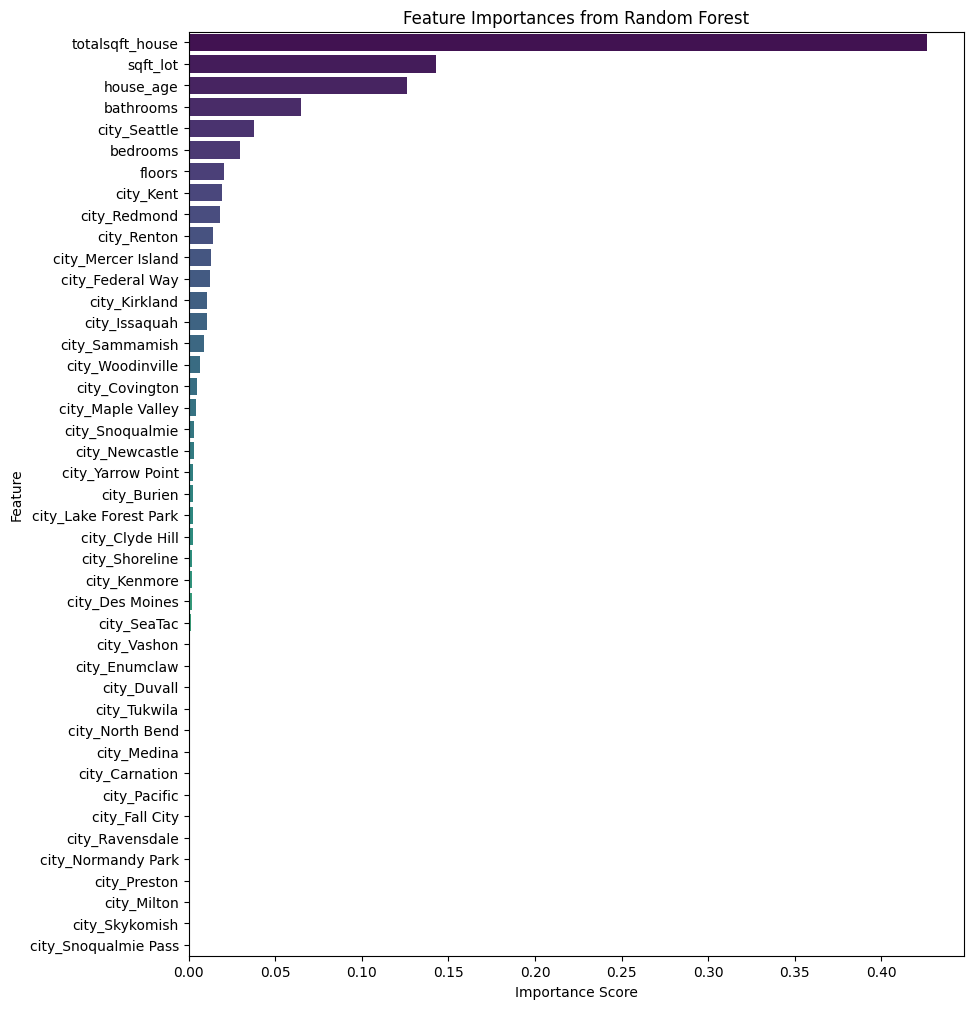

In [104]:
importance = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

### 5.2.2 Visualizing Residuals(Errors)

In [105]:
# Plotting the residual distribution
residuals = y_test - y_rf_prediction2
residuals

3487   -0.433426
1964   -0.002028
1582   -0.252802
296    -0.352929
149     0.046734
          ...   
3386   -0.097944
2905   -0.004394
1450   -0.286012
1070    0.508552
3844    0.125676
Name: price, Length: 1242, dtype: float64

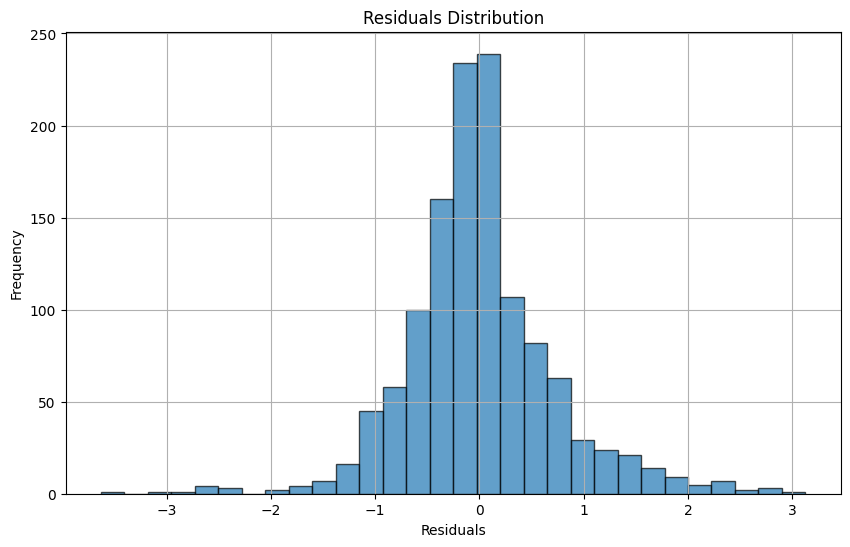

In [106]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 5.2.3 Visualizing Actual vs Predicted Values  

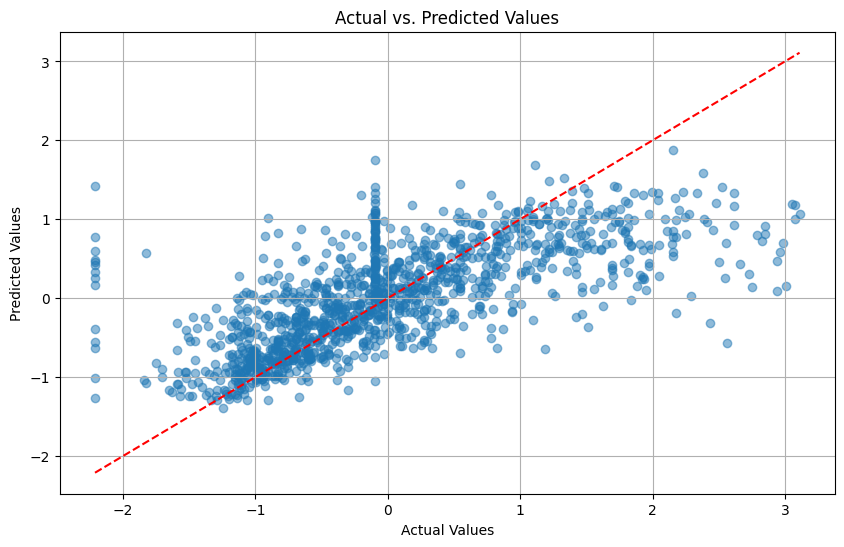

In [107]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_rf_prediction2, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

### 5.2.4 Visualising Feature Predictions

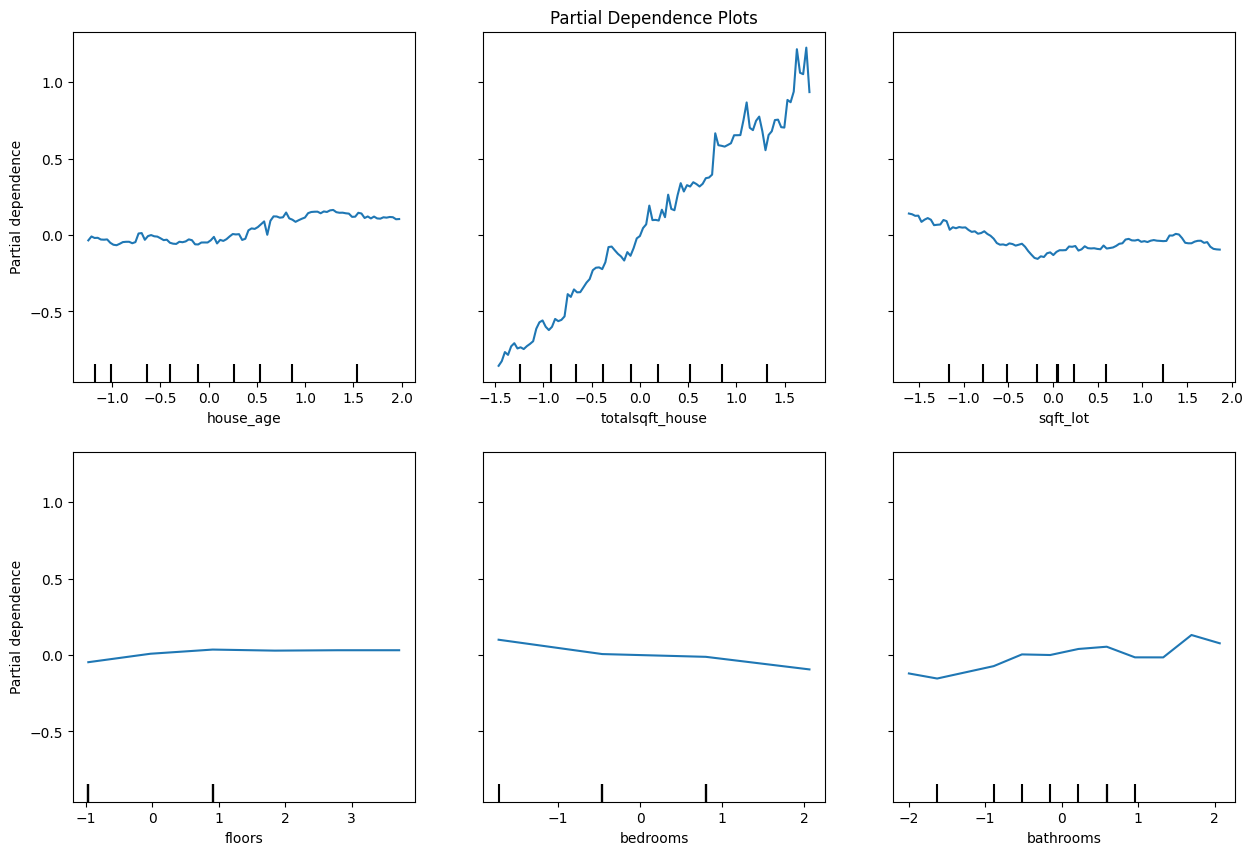

In [108]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=rf,
    X=X_test,
    features=(0, 1, 2, 3, 4, 5), # the features to plot
    
    random_state=5,
    ax=ax,
)
plt.show()

### 5.3 FINDINGS OF THE PROJECT 

#### From the visualizations above, it is discovered that;
#### 1. There is a slightly positive correlation or relationship between house age and price.
#### 2. Initially, lot size had a negative relationship with price, but later on, it shifted to a positive relationship.
#### 3. There is a positive linear relationship between total square feet of the house and prices. It means that as the feature value increases, the prediicted outcome also increases.
#### 3. The number of bedrooms, bathrooms and floors have little or no effect on the predicted outcome.
#### 4. The residuals are normally distributed and it suggests that the model correctly captures the relationships in the data.

### 5.4 CONCLUSIONS 

#### From the analysis, it can be concluded that house size is a significant factor in determining house prices in the USA. Generally, larger homes tend to be more expensive, while smaller homes are typically less expensive. It proves that developers factor in house size in fixing prices.

#### It can be concluded that the age of the house has minimal impact on determining its price in the USA.